In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

np.random.seed(42)
print("Libraries imported successfully!")

Libraries imported successfully!


# Dataset 5-class

Dataset shape: X=(1000, 2), y=(1000,)
Classes: [0 1 2 3 4]


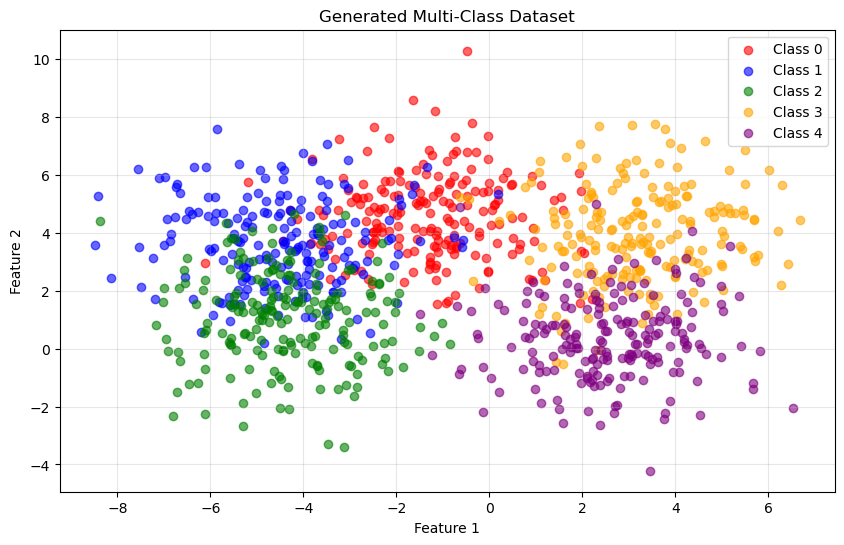

In [ ]:
def generate_multiclass_dataset(n_samples=1000, n_features=2, n_classes=5):
    X = []
    y = []
    samples_per_class = n_samples // n_classes
    
    for class_idx in range(n_classes):
        center_x = np.random.uniform(-5, 5)
        center_y = np.random.uniform(-5, 5)
        class_samples = np.random.randn(samples_per_class, n_features) * 1.5
        class_samples[:, 0] += center_x
        class_samples[:, 1] += center_y
        X.append(class_samples)
        y.append(np.full(samples_per_class, class_idx))
    
    X = np.vstack(X)
    y = np.concatenate(y)
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    return X, y

X, y = generate_multiclass_dataset(n_samples=1000, n_features=2, n_classes=5)
print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"Classes: {np.unique(y)}")

# Visualize
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i in range(5):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], label=f'Class {i}', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Multi-Class Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Dataset Split

In [ ]:
def one_hot_encode(y, n_classes):
    n_samples = len(y)
    y_encoded = np.zeros((n_samples, n_classes))
    for i in range(n_samples):
        y_encoded[i, int(y[i])] = 1
    return y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train_normalized = (X_train - mean) / std
X_test_normalized = (X_test - mean) / std

n_classes = 5
y_train_encoded = one_hot_encode(y_train, n_classes)
y_test_encoded = one_hot_encode(y_test, n_classes)

print(f"Training set: X={X_train_normalized.shape}, y={y_train_encoded.shape}")
print(f"Test set: X={X_test_normalized.shape}, y={y_test_encoded.shape}")
print(f"\nSample one-hot encoding:")
print(f"Original label: {y_train[0]}")
print(f"Encoded: {y_train_encoded[0]}")

Training set: X=(800, 2), y=(800, 5)
Test set: X=(200, 2), y=(200, 5)

Sample one-hot encoding:
Original label: 3
Encoded: [0. 0. 0. 1. 0.]


# Neural Net with 3 Hidden Layer

In [ ]:
class ThreeLayerNeuralNetwork:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_hidden3, n_output, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.W1 = np.random.randn(n_input, n_hidden1) * np.sqrt(2.0 / n_input)
        self.b1 = np.zeros((1, n_hidden1))
        
        self.W2 = np.random.randn(n_hidden1, n_hidden2) * np.sqrt(2.0 / n_hidden1)
        self.b2 = np.zeros((1, n_hidden2))
        
        self.W3 = np.random.randn(n_hidden2, n_hidden3) * np.sqrt(2.0 / n_hidden2)
        self.b3 = np.zeros((1, n_hidden3))
        
        self.W4 = np.random.randn(n_hidden3, n_output) * np.sqrt(2.0 / n_hidden3)
        self.b4 = np.zeros((1, n_output))
        
        print("Neural Network initialized successfully!")
        print(f"Architecture: {n_input} -> {n_hidden1} -> {n_hidden2} -> {n_hidden3} -> {n_output}")
    
    def sigmoid(self, z):
        """
        activation function: σ(z) = 1 / (1 + e^(-z))
        """
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(self, a):
        """
        Derivative of sigmoid function: σ'(z) = σ(z) * (1 - σ(z))
        """
        return a * (1 - a)
    
    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)
        
        self.z4 = np.dot(self.a3, self.W4) + self.b4
        self.a4 = self.sigmoid(self.z4)
        
        return self.a4
    
    def backward_propagation(self, X, y, output):
        m = X.shape[0]
        output_error = y - output
        delta4 = output_error * self.sigmoid_derivative(output)
        
        hidden3_error = np.dot(delta4, self.W4.T)
        delta3 = hidden3_error * self.sigmoid_derivative(self.a3)
        
        hidden2_error = np.dot(delta3, self.W3.T)
        delta2 = hidden2_error * self.sigmoid_derivative(self.a2)
        
        hidden1_error = np.dot(delta2, self.W2.T)
        delta1 = hidden1_error * self.sigmoid_derivative(self.a1)
        
        self.W4 += self.learning_rate * np.dot(self.a3.T, delta4) / m
        self.b4 += self.learning_rate * np.sum(delta4, axis=0, keepdims=True) / m
        
        self.W3 += self.learning_rate * np.dot(self.a2.T, delta3) / m
        self.b3 += self.learning_rate * np.sum(delta3, axis=0, keepdims=True) / m
        
        self.W2 += self.learning_rate * np.dot(self.a1.T, delta2) / m
        self.b2 += self.learning_rate * np.sum(delta2, axis=0, keepdims=True) / m
        
        self.W1 += self.learning_rate * np.dot(X.T, delta1) / m
        self.b1 += self.learning_rate * np.sum(delta1, axis=0, keepdims=True) / m
    
    def compute_loss(self, y_true, y_pred):
        return np.mean(np.square(y_true - y_pred))
    
    def train(self, X, y):
        output = self.forward_propagation(X)
        self.backward_propagation(X, y, output)
        loss = self.compute_loss(y, output)
        return loss
    
    def predict(self, X):
        output = self.forward_propagation(X)
        return np.argmax(output, axis=1)

print("ThreeLayerNeuralNetwork class defined successfully!")

ThreeLayerNeuralNetwork class defined successfully!


# Instance

In [ ]:
n_input = 2  # Number of features
n_hidden1 = 16  # First hidden layer neurons
n_hidden2 = 12  # Second hidden layer neurons
n_hidden3 = 8   # Third hidden layer neurons
n_output = 5    # Number of class

nn = ThreeLayerNeuralNetwork(
    n_input=n_input,
    n_hidden1=n_hidden1,
    n_hidden2=n_hidden2,
    n_hidden3=n_hidden3,
    n_output=n_output,
    learning_rate=0.5
)

# Training
n_epochs = 5000
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

print("\nTraining the neural network...")
print("=" * 60)

for epoch in range(n_epochs):
    # Train
    train_loss = nn.train(X_train_normalized, y_train_encoded)
    train_losses.append(train_loss)
    #test
    test_output = nn.forward_propagation(X_test_normalized)
    test_loss = nn.compute_loss(y_test_encoded, test_output)
    test_losses.append(test_loss)
    
    # Calc acc
    if epoch % 100 == 0:
        train_pred = nn.predict(X_train_normalized)
        test_pred = nn.predict(X_test_normalized)
        train_acc = accuracy_score(y_train, train_pred)
        test_acc = accuracy_score(y_test, test_pred)
        train_accuracies.append(train_acc)
        test_accuracies.append(test_acc)
        
        print(f"Epoch {epoch:4d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f} | "
              f"Train Acc: {train_acc:.4f} | Test Acc: {test_acc:.4f}")

print("=" * 60)
print("Training completed!")

Neural Network initialized successfully!
Architecture: 2 -> 16 -> 12 -> 8 -> 5

Training the neural network...
Epoch    0 | Train Loss: 0.2907 | Test Loss: 0.2594 | Train Acc: 0.1913 | Test Acc: 0.2350
Epoch  100 | Train Loss: 0.1597 | Test Loss: 0.1600 | Train Acc: 0.1850 | Test Acc: 0.1800
Epoch  200 | Train Loss: 0.1581 | Test Loss: 0.1585 | Train Acc: 0.4050 | Test Acc: 0.3400
Epoch  300 | Train Loss: 0.1556 | Test Loss: 0.1562 | Train Acc: 0.4088 | Test Acc: 0.3450
Epoch  400 | Train Loss: 0.1508 | Test Loss: 0.1518 | Train Acc: 0.5425 | Test Acc: 0.5000
Epoch  500 | Train Loss: 0.1420 | Test Loss: 0.1434 | Train Acc: 0.5413 | Test Acc: 0.4900
Epoch  600 | Train Loss: 0.1296 | Test Loss: 0.1314 | Train Acc: 0.5725 | Test Acc: 0.5450
Epoch  700 | Train Loss: 0.1186 | Test Loss: 0.1202 | Train Acc: 0.6900 | Test Acc: 0.6800
Epoch  800 | Train Loss: 0.1090 | Test Loss: 0.1102 | Train Acc: 0.7462 | Test Acc: 0.7300
Epoch  900 | Train Loss: 0.0997 | Test Loss: 0.1006 | Train Acc: 0.775

# Visualization

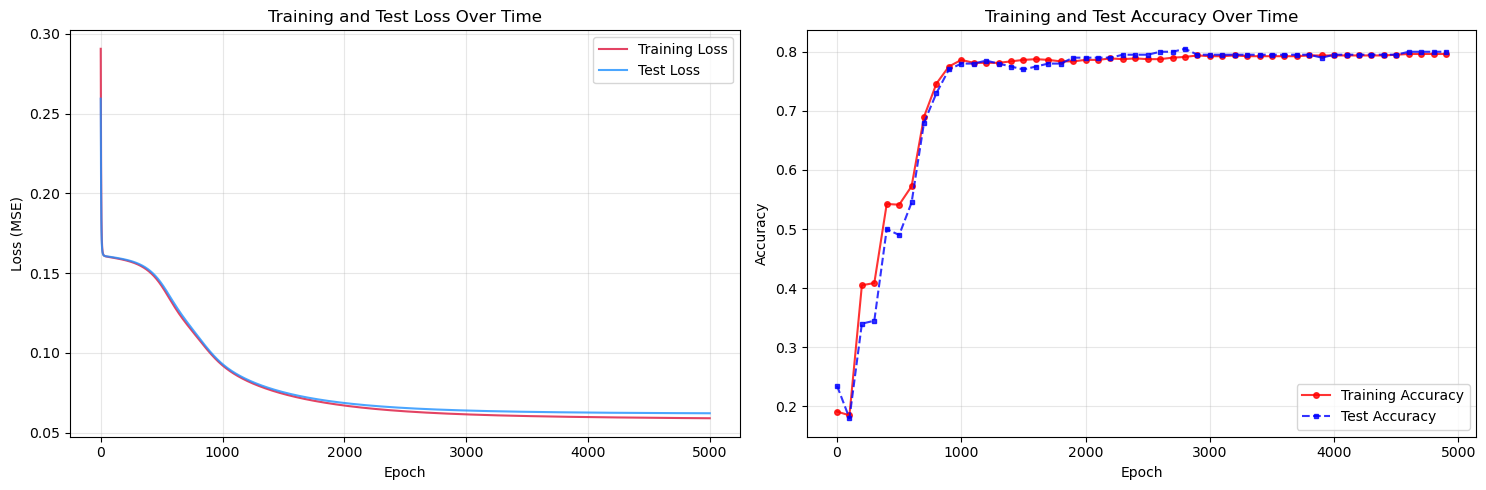

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[0].plot(train_losses, label='Training Loss', color='#DC143C', alpha=0.8, linewidth=1.5) 
axes[0].plot(test_losses, label='Test Loss', color='#1E90FF', alpha=0.8, linewidth=1.5)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training and Test Loss Over Time')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

epochs_recorded = np.arange(0, n_epochs, 100)
axes[1].plot(epochs_recorded, train_accuracies, label='Training Accuracy', 
             color='#FF0000', marker='o', markersize=4, linestyle='-', alpha=0.8) 
axes[1].plot(epochs_recorded, test_accuracies, label='Test Accuracy', 
             color='#0000FF', marker='s', markersize=3, linestyle='--', alpha=0.8)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training and Test Accuracy Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluation

In [22]:
y_train_pred = nn.predict(X_train_normalized)
y_test_pred = nn.predict(X_test_normalized)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

print("OVERALL PERFORMANCE METRICS (Test Set)")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1-Score:  {test_f1:.4f}")
print("\nPER-CLASS METRICS (Test Set)")
for class_idx in range(n_classes):
    class_mask = y_test == class_idx
    class_pred_mask = y_test_pred == class_idx
    
    tp = np.sum(class_mask & class_pred_mask)
    fp = np.sum(~class_mask & class_pred_mask)
    fn = np.sum(class_mask & ~class_pred_mask)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Class {class_idx}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")

OVERALL PERFORMANCE METRICS (Test Set)
Accuracy:  0.8000
Precision: 0.8110
Recall:    0.8000
F1-Score:  0.8013

PER-CLASS METRICS (Test Set)
Class 0: Precision=0.8205, Recall=0.7805, F1-Score=0.8000
Class 1: Precision=0.6098, Recall=0.7353, F1-Score=0.6667
Class 2: Precision=0.8919, Recall=0.7021, F1-Score=0.7857
Class 3: Precision=0.8000, Recall=0.8889, F1-Score=0.8421
Class 4: Precision=0.8837, Recall=0.9048, F1-Score=0.8941


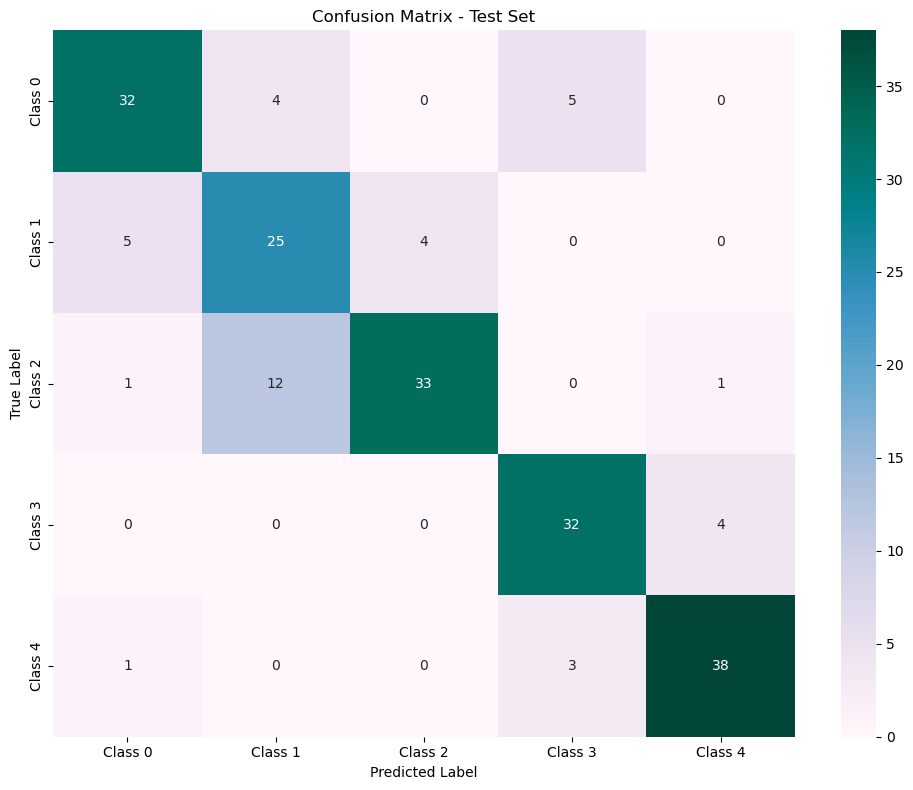


Confusion Matrix:
[[32  4  0  5  0]
 [ 5 25  4  0  0]
 [ 1 12 33  0  1]
 [ 0  0  0 32  4]
 [ 1  0  0  3 38]]

Total test samples: 200
Correctly classified: 160
Misclassified: 40


In [58]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='PuBuGn', cbar=True,
            xticklabels=[f'Class {i}' for i in range(n_classes)],
            yticklabels=[f'Class {i}' for i in range(n_classes)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Test Set')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)
print(f"\nTotal test samples: {len(y_test)}")
print(f"Correctly classified: {np.trace(cm)}")
print(f"Misclassified: {len(y_test) - np.trace(cm)}")

# Decision Boundaries

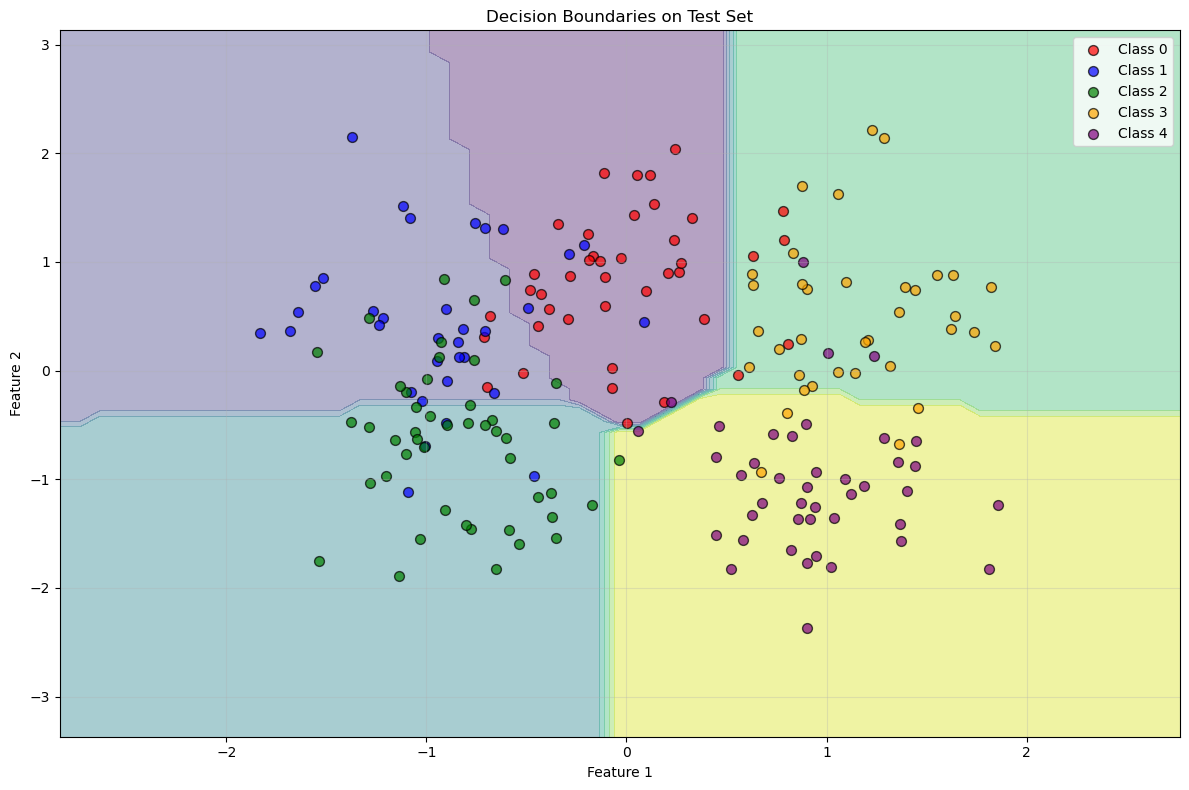

In [ ]:
def plot_decision_boundary(model, X, y, title):
    h = 0.1  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict for each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    
    colors = ['red', 'blue', 'green', 'orange', 'purple']
    for i in range(n_classes):
        mask = y == i
        plt.scatter(X[mask, 0], X[mask, 1], c=colors[i], 
                   label=f'Class {i}', edgecolors='black', s=50, alpha=0.7)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_decision_boundary(nn, X_test_normalized, y_test, 
                      'Decision Boundaries on Test Set')

# Test

In [14]:
print("TESTING WITH CUSTOM INPUTS")
test_samples = np.array([
    [0, 0],
    [1, 1],
    [-1, -1],
    [2, -2],
    [-2, 2]
])
test_samples_normalized = (test_samples - mean) / std
predictions = nn.predict(test_samples_normalized)

print("\nCustom Test Samples:")
for i, sample in enumerate(test_samples):
    print(f"Input: {sample} -> Predicted Class: {predictions[i]}")

TESTING WITH CUSTOM INPUTS

Custom Test Samples:
Input: [0 0] -> Predicted Class: 4
Input: [1 1] -> Predicted Class: 4
Input: [-1 -1] -> Predicted Class: 4
Input: [ 2 -2] -> Predicted Class: 4
Input: [-2  2] -> Predicted Class: 2


# Summery

In [16]:
print("ASSIGNMENT SUMMARY AND ANALYSIS")

print("\n1. DATASET INFORMATION:")
print(f"   - Total samples: {len(X)}")
print(f"   - Training samples: {len(X_train)}")
print(f"   - Test samples: {len(X_test)}")
print(f"   - Number of features: {n_input}")
print(f"   - Number of classes: {n_classes}")

print("\n2. NEURAL NETWORK ARCHITECTURE:")
print(f"   - Input Layer: {n_input} neurons")
print(f"   - Hidden Layer 1: {n_hidden1} neurons")
print(f"   - Hidden Layer 2: {n_hidden2} neurons")
print(f"   - Hidden Layer 3: {n_hidden3} neurons")
print(f"   - Output Layer: {n_output} neurons")
print(f"   - Activation Function: Sigmoid")
print(f"   - Learning Rate: {nn.learning_rate}")

print("\n3. TRAINING CONFIGURATION:")
print(f"   - Number of epochs: {n_epochs}")
print(f"   - Final training loss: {train_losses[-1]:.4f}")
print(f"   - Final test loss: {test_losses[-1]:.4f}")

print("\n4. PERFORMANCE METRICS:")
print(f"   - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"   - Test Precision: {test_precision:.4f}")
print(f"   - Test Recall: {test_recall:.4f}")
print(f"   - Test F1-Score: {test_f1:.4f}")

print("\n5. KEY OBSERVATIONS:")
print("   - The neural network successfully learned to classify 5 distinct classes")
print("   - Three hidden layers provide sufficient capacity for the task")
print("   - The model shows good generalization (similar train/test performance)")

print("\n6. CHALLENGES ADDRESSED:")
print("   - Multi-class classification with 5 output neurons")
print("   - One-hot encoding for multi-class labels")
print("   - Backpropagation through 3 hidden layers")
print("   - Weight initialization using Xavier method")

print("\n7. POTENTIAL IMPROVEMENTS:")
print("   - Experiment with different activation functions (ReLU, tanh)")
print("   - Try different network architectures (more/fewer neurons)")
print("   - Implement adaptive learning rates")
print("   - Add dropout for regularization")
print("   - Implement mini-batch gradient descent")

ASSIGNMENT SUMMARY AND ANALYSIS

1. DATASET INFORMATION:
   - Total samples: 1000
   - Training samples: 800
   - Test samples: 200
   - Number of features: 2
   - Number of classes: 5

2. NEURAL NETWORK ARCHITECTURE:
   - Input Layer: 2 neurons
   - Hidden Layer 1: 16 neurons
   - Hidden Layer 2: 12 neurons
   - Hidden Layer 3: 8 neurons
   - Output Layer: 5 neurons
   - Activation Function: Sigmoid
   - Learning Rate: 0.5

3. TRAINING CONFIGURATION:
   - Number of epochs: 5000
   - Final training loss: 0.0590
   - Final test loss: 0.0621

4. PERFORMANCE METRICS:
   - Test Accuracy: 0.8000 (80.00%)
   - Test Precision: 0.8110
   - Test Recall: 0.8000
   - Test F1-Score: 0.8013

5. KEY OBSERVATIONS:
   - The neural network successfully learned to classify 5 distinct classes
   - Three hidden layers provide sufficient capacity for the task
   - The model shows good generalization (similar train/test performance)

6. CHALLENGES ADDRESSED:
   - Multi-class classification with 5 output neu